# Dates and Times and Matplotlib

## In Base Python

In [12]:
from datetime import date, time, datetime , timedelta
from dateutil import tz

#run cell
today = date.today()
today

datetime.date(2022, 12, 6)

In [13]:
#run cell
print(today.year)
print(today.month)
print(today.day)

2022
12
6


In [15]:
#run cell
now = datetime.now()
now

datetime.datetime(2022, 12, 6, 16, 15, 20, 111714)

In [16]:
#run cell
print(now.hour)
print(now.minute)
print(now.second)

16
15
20


In [17]:
#run cell
now = datetime.now(tz=tz.tzlocal())
now

datetime.datetime(2022, 12, 6, 16, 17, 39, 26771, tzinfo=tzlocal())

In [18]:
#run cell
now.tzname()

'שעון רגיל ירושלים'

In [19]:
#run cell
now = datetime.now(tz=tz.gettz('Europe/Paris'))
print(now)

2022-12-06 15:18:44.608986+01:00


#### Create a date for tomorrow using today plus a 'timedelta' of one day

In [23]:
today + timedelta(days = 1)

datetime.date(2022, 12, 7)

#### How about the date one month from now?


In [48]:
# hint: timedelta can be seconds, minutes, hours and days
#CODE HERE
today + timedelta (days = 31)

datetime.date(2023, 1, 6)

#### How long until the end of the lesson?

In [49]:
#CODE HERE


## In Numpy

In [74]:
# run cell
import numpy as np 

end = np.datetime64('2022-12-06 17:30')
end

numpy.datetime64('2022-12-06T17:30')

#### What do you think this does?

In [75]:
year = np.datetime64(end,"Y")
hour = np.datetime64(end,"h")
print(year)
print(hour)

2022
2022-12-06T17


#### So if you really want to extract the hour you will need to convert to regular Python datetime using astype(object)


In [76]:
end.astype(object).minute

30

#### In NumPy you can use timedelta64

In [83]:
# add an hour to the end of the lesson
# CODE HERE
end +  60

numpy.datetime64('2022-12-06T18:30')

#### Make an array of all dates between 06.12.2022 and 06.01.2023 using np.arange

In [91]:
#CODE HERE
np.arange(np.datetime64('2022-12-06' , '2022-12-06' ))


TypeError: Invalid datetime unit "-12-06" in metadata

## In Pandas

In [47]:
# run cell
import pandas as pd

print(pd.Timestamp(year = 2022, month = 12, day = 6, hour = 17, minute = 0, second = 0))
print(pd.Timestamp(2022,12,6,17))
print(pd.Timestamp('06-12-2022 17:00:00'))
print(pd.Timestamp('Dec 6, 2022 17:00:00'))
print(pd.Timestamp(10**10))

2022-12-06 17:00:00
2022-12-06 17:00:00
2022-06-12 17:00:00
2022-12-06 17:00:00
1970-01-01 00:00:10


#### Use to_datetime() with dayfirst = True to convert '06-12-2022 17:00:00' to the correct date

In [60]:
# CODE HERE
pd.to_datetime('06-12-2022 17:00:00', dayfirst = True)

Timestamp('2022-12-06 17:00:00')

In [61]:
#run cell
year = pd.Period('2022')
print(year)
print(year.start_time)
print(year.end_time)

2022
2022-01-01 00:00:00
2022-12-31 23:59:59.999999999


In [66]:
#run cell
month = pd.Period('2022-12-06',freq='M')
month

Period('2022-12', 'M')

In [67]:
# run cell
month + 6

Period('2023-06', 'M')

#### Use pd.date_range() with periods=7 to create a range of dates for the next 7 days

In [70]:
next_7 = pd.date_range('06-12-2022' , periods = 7)

next_7

DatetimeIndex(['2022-06-12', '2022-06-13', '2022-06-14', '2022-06-15',
               '2022-06-16', '2022-06-17', '2022-06-18'],
              dtype='datetime64[ns]', freq='D')

#### You can use dt on pandas series of dates or times to use methods  like  in base python.

In [87]:
#run cell
next_7 = pd.Series(next_7)
next_7.dt.day

0    12
1    13
2    14
3    15
4    16
5    17
6    18
dtype: int64

## Matplotlib

### Which type of graph to choose?

1. If the variable is categorical (type str) or quantative discrete (type integer)  and you need to plot the frequencies - use a bar plot or pie plot.
2. If the variable is quantative continuous and you need to plot frequancies - use histogram.
3. If the data is quantative continuous and you want to see its values relative to another variable - use line plot
3. To compare distributions of ordered variables use boxplot.
4. To check if two quantative variables are correlated - use scatter plot.

In [92]:
#run cell
import matplotlib.pyplot as plt

#### Read 'Bakery sales.csv' into data frame, look at first few rows and get info about the columns

In [98]:
#is there an index_col ? 
#CODE HERE
df = pd.read_csv('Bakery sales.csv')
print(df.head())
df.info()

   Unnamed: 0        date   time  ticket_number               article  \
0           0  2021-01-02  08:38       150040.0              BAGUETTE   
1           1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5  2021-01-02  09:14       150041.0                  PAIN   
4           8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity unit_price  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-

####  Try again using parse_date to make pd.read_csv read the date and time as datetime 

In [103]:
#CODE HERE
df = pd.read_csv('Bakery sales.csv' , parse_dates = ['date','time'] )
df = df.drop('Unnamed: 0' , axis = 1)
print(df.head())
df.info()
    

        date                time  ticket_number               article  \
0 2021-01-02 2022-12-06 08:38:00       150040.0              BAGUETTE   
1 2021-01-02 2022-12-06 08:38:00       150040.0      PAIN AU CHOCOLAT   
2 2021-01-02 2022-12-06 09:14:00       150041.0      PAIN AU CHOCOLAT   
3 2021-01-02 2022-12-06 09:14:00       150041.0                  PAIN   
4 2021-01-02 2022-12-06 09:25:00       150042.0  TRADITIONAL BAGUETTE   

   Quantity unit_price  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           234005 non-null  datetime64[ns]
 1   time           234005 non-null  datetime64[ns]
 2   ticket_number  234005 non-null  float64       
 3   article        234005 non-null  obje

#### Make unit_price into a float , discard euro symbol

In [108]:
# CODE HERE
df.unit_price = df.unit_price.str.replace(',','.').str.replace('€','').astype('float')
df.head()

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,2022-12-06 08:38:00,150040.0,BAGUETTE,1.0,0.90
1,2021-01-02,2022-12-06 08:38:00,150040.0,PAIN AU CHOCOLAT,3.0,1.20
2,2021-01-02,2022-12-06 09:14:00,150041.0,PAIN AU CHOCOLAT,2.0,1.20
3,2021-01-02,2022-12-06 09:14:00,150041.0,PAIN,1.0,1.15
4,2021-01-02,2022-12-06 09:25:00,150042.0,TRADITIONAL BAGUETTE,5.0,1.20


#### What are the minimum and maximum dates?

In [110]:
#CODE HERE
print(df.date.min() , df.date.max())

2021-01-02 00:00:00 2022-09-30 00:00:00


#### Article is a categorical variable. Make a series of the total numbers of each type of bread bought on 2021-01-02.

In [116]:
 #CODE HERE
day1 = df.loc[df.date == pd.Timestamp('2021-01-02')]
article = day1.groupby('article').Quantity.sum()
article.head()

article
BAGUETTE      46.0
BANETTE       40.0
BANETTINE      6.0
BOULE 200G     6.0
BOULE 400G    11.0
Name: Quantity, dtype: float64

#### Now make a bar plot for article

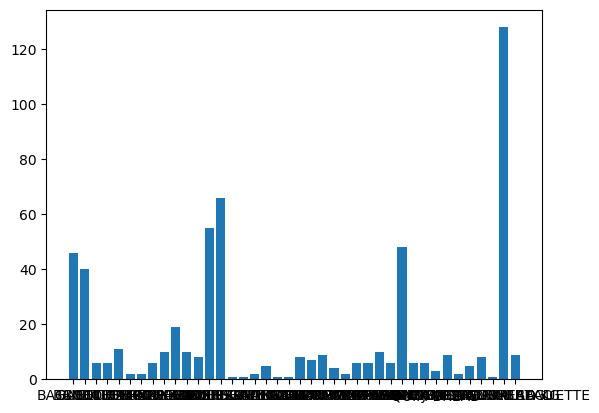

In [117]:
plt.bar(article.index,article)
plt.show()

#### Increase figure size and rotate xticks

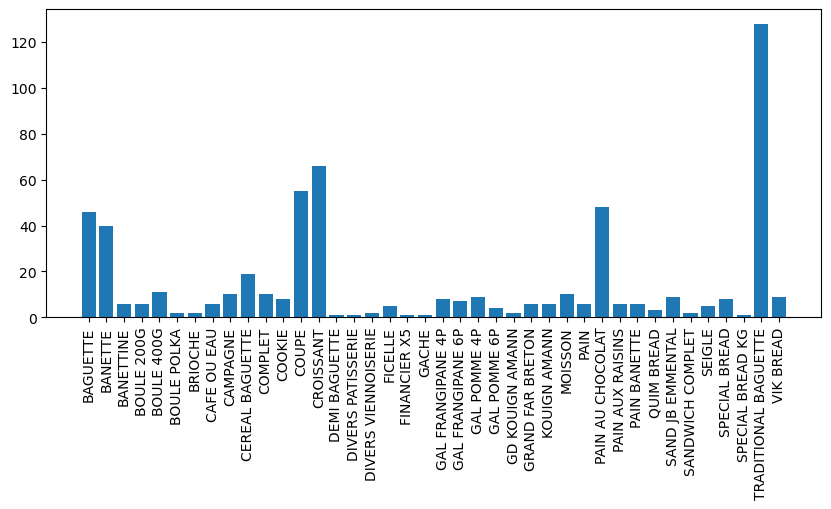

In [118]:
# run cell
plt.rcParams['figure.figsize']=[10,4]
plt.bar(article.index,article)
plt.xticks(rotation=90)
plt.show()

#### We can add axis labels and a title

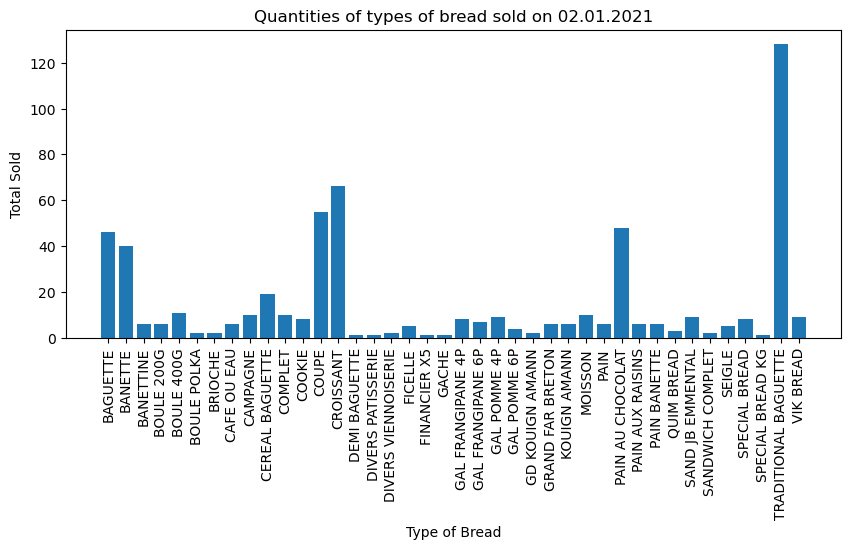

In [119]:
plt.rcParams['figure.figsize']=[10,4]
plt.bar(article.index,article)
plt.xticks(rotation=90)
plt.xlabel('Type of Bread')
plt.ylabel('Total Sold')
plt.title('Quantities of types of bread sold on 02.01.2021')
plt.show()

#### Make pie chart of 8 best selling articles

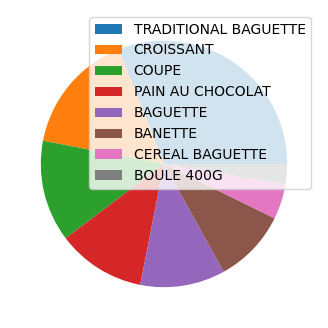

In [123]:
#CODE HERE
plt.pie(article.nlargest(8))
plt.legend(article.nlargest(8).index)
plt.show()


#### Make a series of the total income by month

In [ ]:
# first add a column 'total' containing the total sale by multiplying the quantity bought by the unit price 
df['total']= # CODE HERE


#### Make a line plot of income_by_month

In [ ]:
#CODE HERE


#### When are the highest sales? When are the lowest?

#### Make a series total_order by grouping by ticket_number and calculating the total sale from each ticket

In [ ]:
#CODE HERE


#### Make a boxplot showing the distribution of total_order

In [ ]:
plt.boxplot(total_order)

plt.show()

#### There are too many outliers. Use only prices whose distance from the upper and lower quartiles is less than 1.5 times the IQR.

In [ ]:
q1=total_order.quantile(0.25)
q3=total_order.quantile(0.75)
IQR = q3-q1
filt =total_order.apply(lambda x: x > q1-1.5*IQR  and x < q3 +1.5*IQR)
filtered_total=total_order[filt]

plt.boxplot(filtered_total)
plt.show()

#### Calculate the mean, median, mode and standard deviation of total order.

In [ ]:
from scipy import stats
print("mean:",#CODE HERE)
print('median: ', #CODE HERE)
print(#CODE HERE)
print('standard deviation: ',#CODE HERE)

#### Plot histogram for total income by order between 0 and 5

In [ ]:
#CODE HERE



#### Make a scatter plot showing the relationship between unit_price and total. Are the variables linearly correlated? Positive or negative correlation?

In [ ]:
#CODE HERE

#### Calculate the correlation coefficient for unit_price and total

In [ ]:
np.corrcoef(df.unit_price,df.total)

In [ ]:
np.corrcoef(df.unit_price,df.total)[1][0]